# [Lab Session 3](fourier.ipynb)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


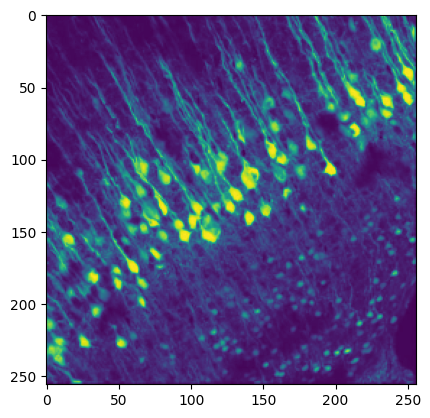

In [2]:
cell_img = plt.imread('data/cells.png')
cell_img_resize = resize(cell_img,(256, 256))
plt.imshow(cell_img_resize)

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [3]:
cell_ft = np.fft.fft2(cell_img_resize)
print(cell_ft.dtype)

complex128


**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [4]:
amplitude = np.abs(cell_ft) # sagt welche frequenz wie stark vorkommt
phase = np.angle(cell_ft) # wo die Frequenz im bild ist und wie sie verschoben sind

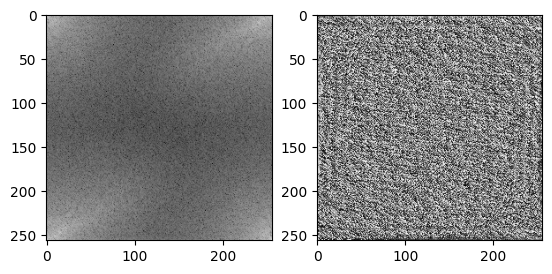

In [5]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


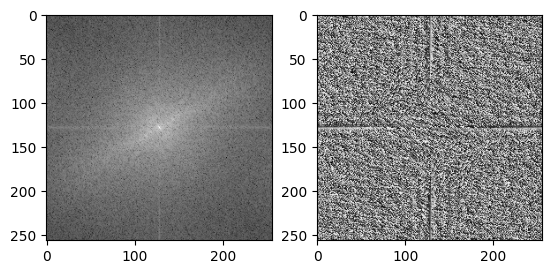

In [6]:
cell_ft_shift = np.fft.fftshift(cell_ft) # spektrum wird so verschoben, dass Nullfrequenz in der Mitte des Bilds ist

amplitude2 = np.abs(cell_ft_shift)
phase2 = np.angle(cell_ft_shift)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude2), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase2, 'gray')




**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


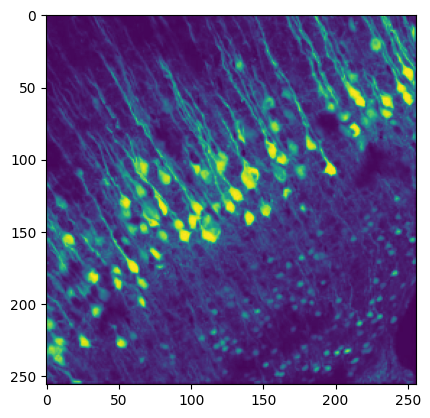

In [7]:

unshifted = np.fft.ifftshift(cell_ft_shift) # um von Frequenzraum zurück in den Bildraum zu gehen; nach fftshift

restored_img = np.fft.ifft2(unshifted)
restored_img = np.real(restored_img)
plt.imshow(restored_img)


---


**[Task 2 (a).]()** Load the brain MR image.


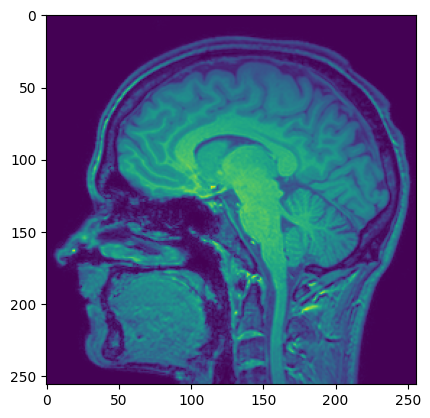

In [8]:
brain_MR = plt.imread("data/brain_mri.png")
brain_img_resize = resize(brain_MR,(256, 256))
plt.imshow(brain_img_resize)

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


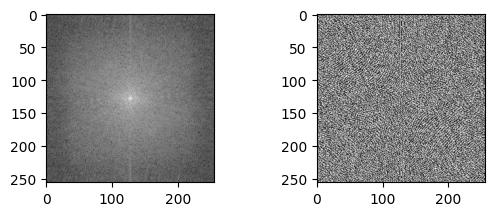

In [9]:
brain_fft = np.fft.fft2(brain_img_resize)
brain_fft_shifted = np.fft.fftshift(brain_fft)

amplitude = np.abs(brain_fft_shifted)
phase = np.angle(brain_fft_shifted)

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(2, 2, 2)
plt.imshow(phase, 'gray')

In [10]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain MR image and the phase of cell image. Do the IFFT and display the resulting image.


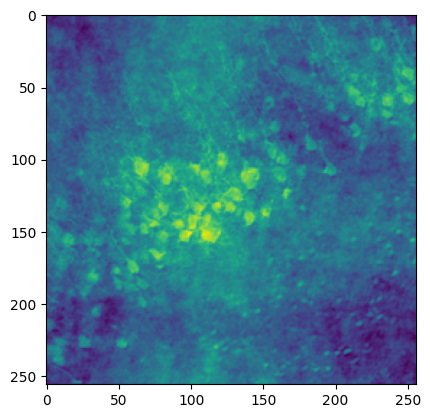

In [11]:
# Brain
brain_fft = np.fft.fft2(brain_img_resize)
brain_fft_shifted = np.fft.fftshift(brain_fft)

amplitude = np.abs(brain_fft_shifted)
phase = np.angle(brain_fft_shifted)

# Cell
cell_ft = np.fft.fft2(cell_img_resize)
cell_ft_shift = np.fft.fftshift(cell_ft) # spektrum wird so verschoben, dass Nullfrequenz in der Mitte des Bilds ist

amplitude2 = np.abs(cell_ft_shift)
phase2 = np.angle(cell_ft_shift)

# Beides kombinieren 
merged = to_complex_array(amplitude, phase2)

# Shift zurücknehmen
merged_unshifted = np.fft.ifftshift(merged)

# inverse FFT
merged_restored = np.fft.ifft2(merged_unshifted).real

plt.figure()
plt.imshow(merged_restored)

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


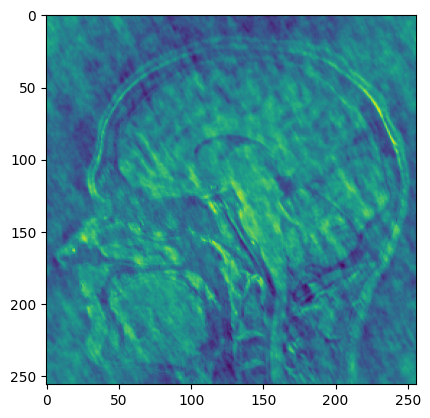

In [12]:
# Brain
brain_fft = np.fft.fft2(brain_img_resize)
brain_fft_shifted = np.fft.fftshift(brain_fft)

amplitude = np.abs(brain_fft_shifted)
phase = np.angle(brain_fft_shifted)

# Cell
cell_ft = np.fft.fft2(cell_img_resize)
cell_ft_shift = np.fft.fftshift(cell_ft) # spektrum wird so verschoben, dass Nullfrequenz in der Mitte des Bilds ist

amplitude2 = np.abs(cell_ft_shift)
phase2 = np.angle(cell_ft_shift)

# Beides kombinieren 
merged = to_complex_array(amplitude2, phase)

# Shift zurücknehmen
merged_unshifted = np.fft.ifftshift(merged)

# inverse FFT
merged_restored = np.fft.ifft2(merged_unshifted).real

plt.figure()
plt.imshow(merged_restored)

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [13]:
filter_window_size = 50 # Fenster soll 50x50 sein

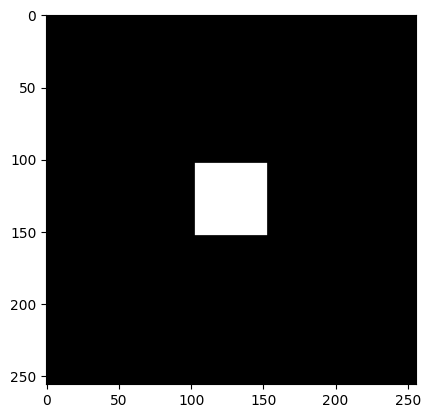

In [14]:
# Bildgröße definieren
height = 256
width = 256

mask_low = np.zeros((height, width)) #array der mit Nullen gefüllt ist

# Mittelpunkt berechnen
y = height // 2
x = width // 2

fw = filter_window_size
half = fw // 2

# Quadrat in der Mitte 
r0 = y-half
r1 = x + half
c0 = x - half
c1 = y + half

mask_low[r0:r1, c0:c1]=1.0 # es wird der bereich definiert in dem das Quadrat sich befindet; =1.0 sagt, dass Pixel dann weiß ist

plt.imshow(mask_low, cmap='gray')
plt.show()



**[Task 3 (b).]()** Create a highpass filter maks.


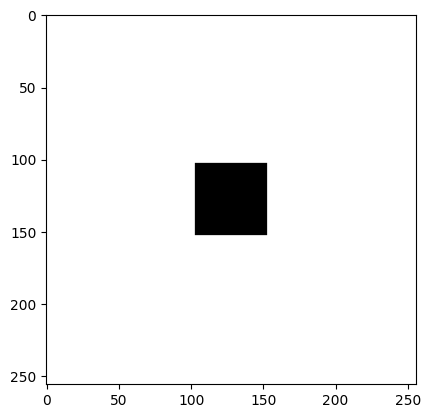

In [15]:
mask_high = 1- mask_low


plt.imshow(mask_high, cmap='gray')
plt.show()

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


/tmp/ipykernel_18405/975307996.py:18: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(brain_low_amplitude), 'gray')
/tmp/ipykernel_18405/975307996.py:22: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(brain_high_amplitude), 'gray')


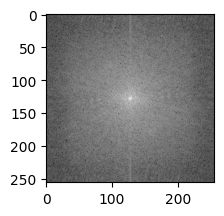

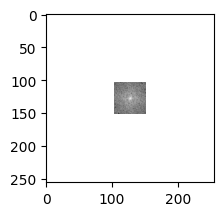

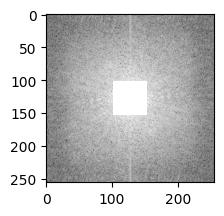

In [16]:
# Brain
brain_fft = np.fft.fft2(brain_img_resize)
brain_fft_shifted = np.fft.fftshift(brain_fft)

amplitude = np.abs(brain_fft_shifted)

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(np.log(amplitude), 'gray')


#Maske anwenden
brain_low_amplitude = mask_low * amplitude
brain_high_amplitude = mask_high * amplitude

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(np.log(brain_low_amplitude), 'gray')

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(np.log(brain_high_amplitude), 'gray')



**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


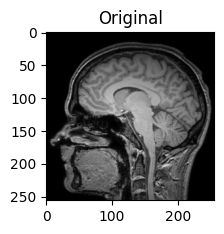

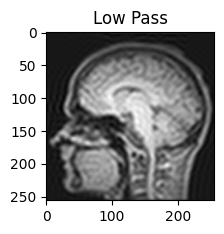

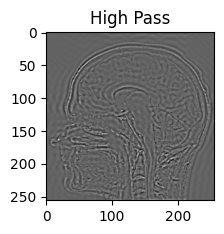

In [17]:
# Brain
brain_fft = np.fft.fft2(brain_img_resize)
brain_fft_shifted = np.fft.fftshift(brain_fft)

amplitude = np.abs(brain_fft_shifted)
phase = np.angle(brain_fft_shifted)


# Beides kombinieren 
merged = to_complex_array(amplitude, phase2)

low_complex = to_complex_array(brain_low_amplitude, phase)
high_complex = to_complex_array(brain_high_amplitude, phase)

low_ifft = np.fft.ifft2(np.fft.ifftshift(low_complex)).real
high_ifft = np.fft.ifft2(np.fft.ifftshift(high_complex)).real


plt.subplot(2, 2, 1)
plt.imshow(brain_img_resize, cmap= 'gray')
plt.title('Original')
plt.show()

plt.subplot(2, 2, 1)
plt.imshow(low_ifft, cmap= 'gray')
plt.title('Low Pass')
plt.show()

plt.subplot(2, 2, 1)
plt.imshow(high_ifft, cmap= 'gray')
plt.title('High Pass')
plt.show()



---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [18]:
def my_dft(img):
    M, N = img.shape # Höhe und Breite des Bldes
    dft = np.zeros(img.shape, dtype=complex)

    for u in range (M): # u und v sind Frequenz Indizes
        for v in range (N):
            sum_value = 0.0 + 0.0j # imaginäre Einheit 
            for x in range (M):
                for y in range (N):
                    exponent = -2j *np.pi*((u*x)/M+(v*y)/N)
                    sum_value += [x, y] * np.exp(exponent)
            dft[u,v]= sum_value/(M*N)
    return dft

**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [19]:
def my_idft(img):
    M,N = img.shape # Höhe und Breite des Bldes

    img_rec = np.zeros((M,N), dtype=complex)

    for x in range (M): 
        for y in range (N):
            sum_value = 0.0 + 0.0j # imaginäre Einheit 
            for u in range (M):
                for v in range (N):
                    exponent =2j *np.pi*((u*x)/M+(v*y)/N)
                    sum_value +=[u,v]*np.exp(exponent)
            img_rec[x,y]= sum_value
    return img_rec.real

Due to high computational costs, we need to resize the image.


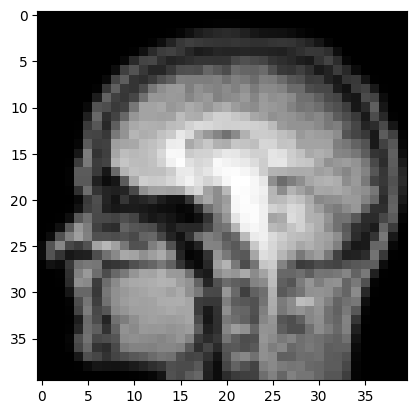

In [20]:
test_img = resize(brain_MR, (40, 40))
plt.imshow(test_img, 'gray')



**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


In [21]:
img = plt.imread("data/brain_mri.png") # Bild laden
if img.ndim == 3:
    img = img.mean(axis=2)

img = img.astype(float)
print(img.dtype)

# DFT anwenden
dft_result = my_dft(img)


# phase und Amplitude berechnen
amp = np.abs(dft_result)
pha = np.angle(dft_result)

# shift anwenden
amp_shift = np.fft.fftshift(amp)
pha_shift = np.fft.fftshift(pha)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 2)
plt.imshow(np.log(amp_shift +1 ), 'gray')
plt.title('amplitude')

plt.subplot(1, 2, 2)
plt.imshow(pha_shift, 'gray')
plt.title('phase')

plt.show()



float64


TypeError: can't multiply sequence by non-int of type 'numpy.complex128'

**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
